# Esercizio Marketing Bancario

Importiamo il dataset e guardiamo com'è 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv(r'C:\Users\PC DI VINCI\Desktop\Università\III anno\Data anal\Esercizi\EsercizioEsame\Esercitazioni per esame\Marketing bancario\dataset csv\bank-additional-full.csv', sep=';')
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [2]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 1°

Controlliamo subito se sono presenti valori mancanti

In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Non sono presenti valori nulli , controlliamo i valori delle colonne

In [5]:
for column in df.columns:
    print('\n',column)
    print(df[column].unique())


 age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

 job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

 marital
['married' 'single' 'divorced' 'unknown']

 education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

 default
['no' 'unknown' 'yes']

 housing
['no' 'yes' 'unknown']

 loan
['no' 'yes' 'unknown']

 contact
['telephone' 'cellular']

 month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

 day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

 duration
[ 261  149  226 ... 1246 1556 1868]

 campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37

Sono presenti dei valori unknown ma decido comunque di lasciarli sia perché essi vengono dichiarati nella traccia
e sia perché possono risultare correlati alla variabile target.

Codifico le variabili categoriche in numeriche cosi da da poterle usare nella matrice di correlazione

In [6]:
colonne = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
df[colonne] = df[colonne].apply(lambda x: pd.factorize(x)[0])
df.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

## 2° 

Andiamo a costruire la matrice di correlazione

Matrice di correlazione:



Text(0.5, 1.0, 'Matrice di correlazione')

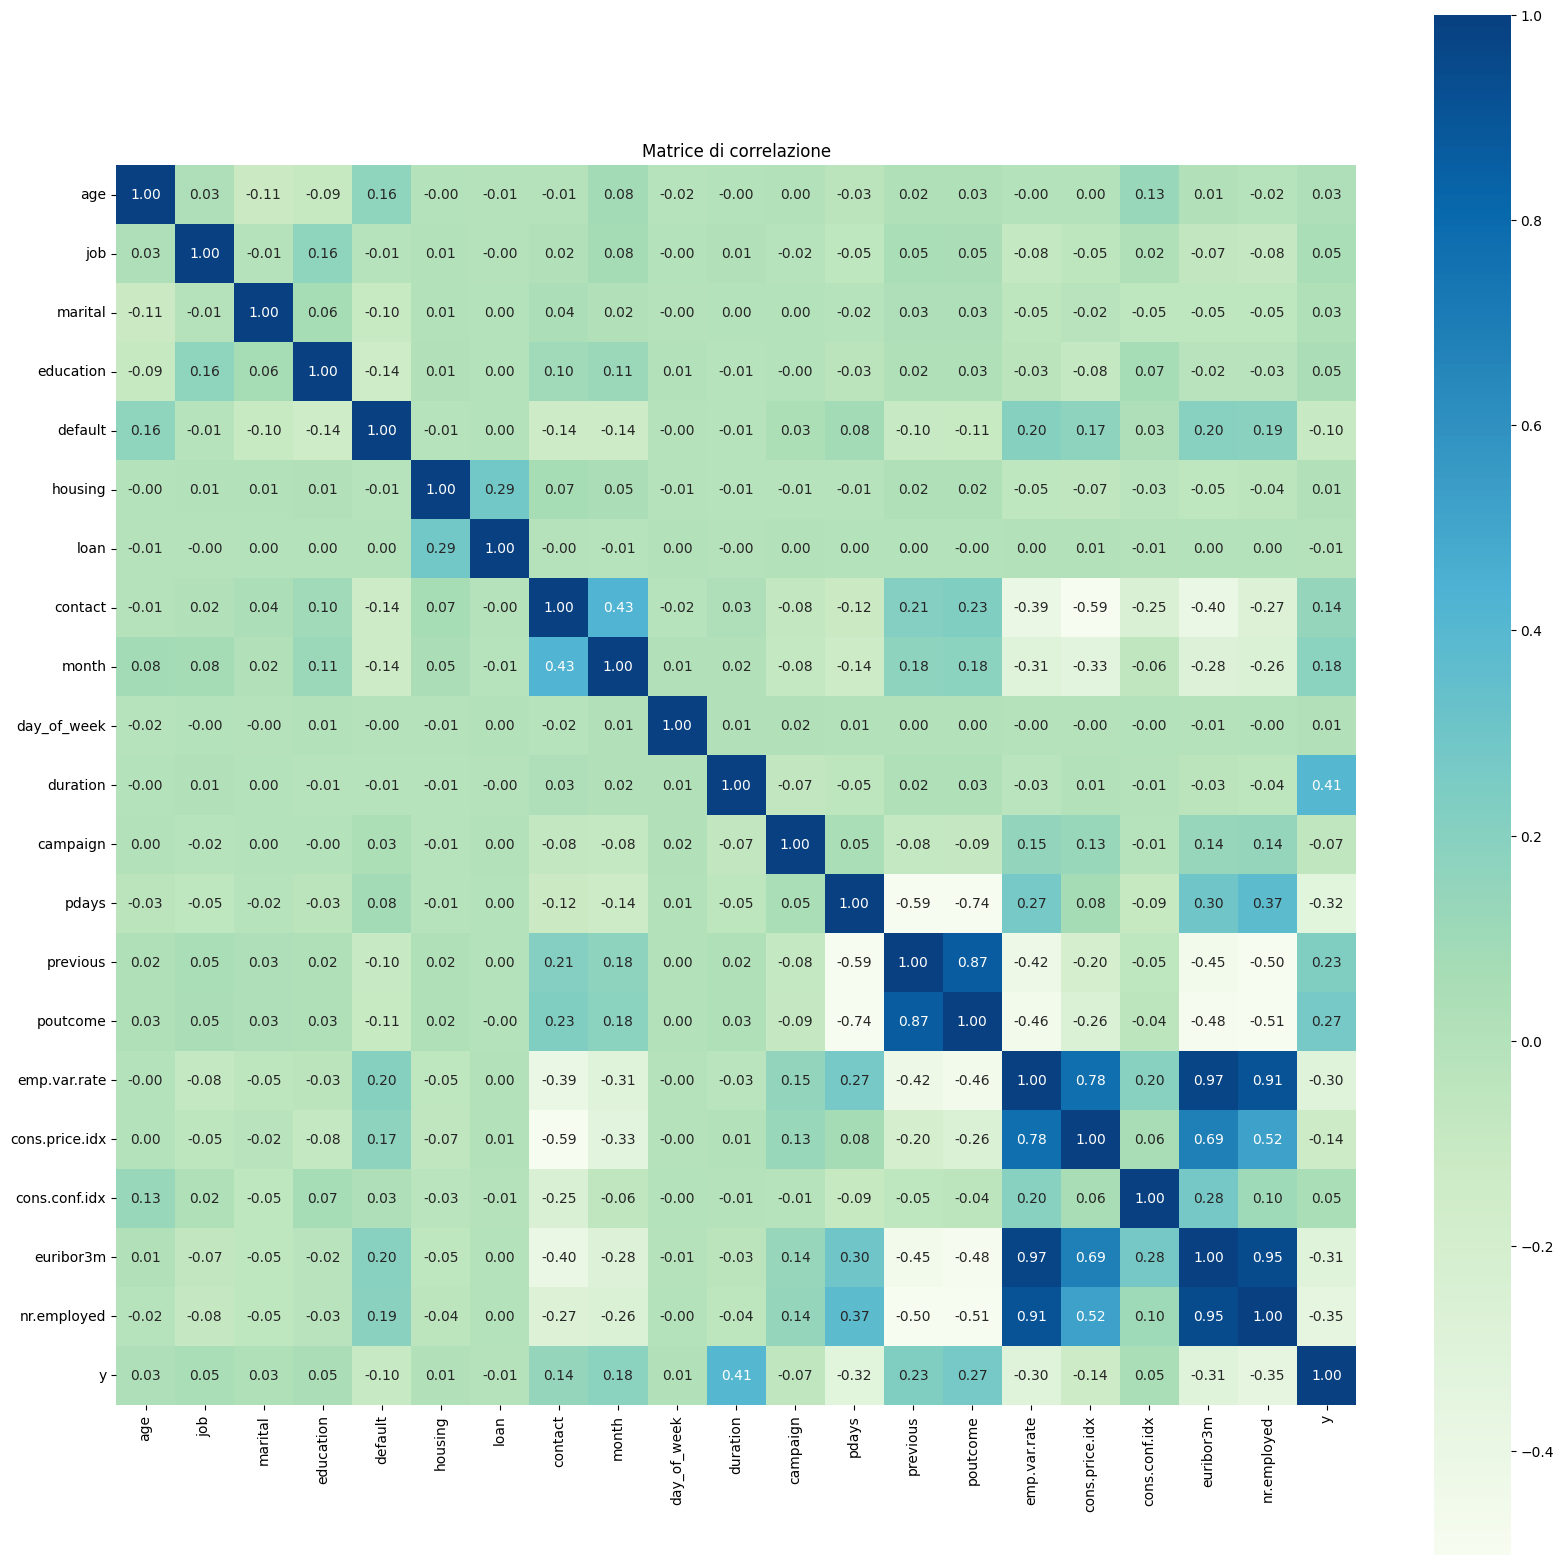

In [7]:
print('Matrice di correlazione:\n')
corr_matrix = df.corr()
plt.figure(figsize=(20,20))
plot = sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, fmt='.2f', cmap='GnBu', robust=True)
plt.title('Matrice di correlazione')

Troviamo gli attributi maggiormente correlati con la variabile target con un threshold > 0.2

In [8]:
def remove_unrelated(df_model, threshold):
    corr = df_model.corr()
    corr_target = abs(corr['y'])
    relevant_features = corr_target[corr_target > threshold]
    print("Le features maggiormente correlate con valore > di", threshold,"sono:\n")
    print(relevant_features)
    
    rel_feat = relevant_features.keys().tolist()
    new_df = df_model[rel_feat]
    
    return new_df

new_df = remove_unrelated(df, 0.2)

Le features maggiormente correlate con valore > di 0.2 sono:

duration        0.405274
pdays           0.324914
previous        0.230181
poutcome        0.270373
emp.var.rate    0.298334
euribor3m       0.307771
nr.employed     0.354678
y               1.000000
Name: y, dtype: float64


Così abbiamo selezionato tutti gli attributi che hanno una correlazione in senso assoluto > 0.2 con la variabile target

## 3° e 4°

Attraverso un ciclo for addestriamo ed usiamo due classificatori e, infine, ne valutiamo l'accuratezza


Classificatore 1 - Random forest:



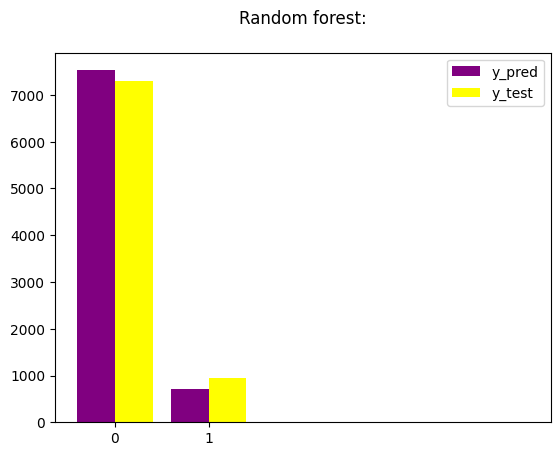

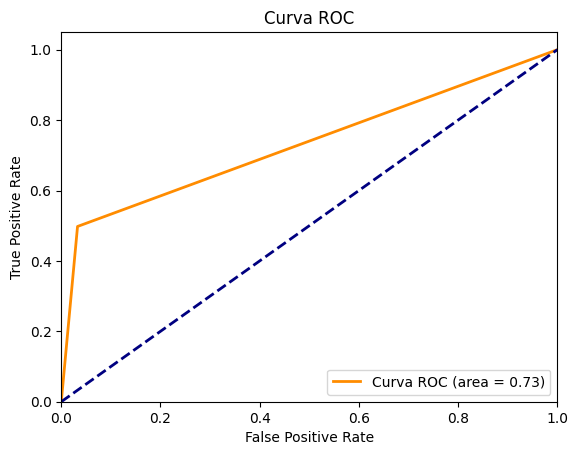

Accuracy: 0.9133284777858703
Precision: 0.8001412566792894
Recall: 0.7325550952765868
F_score: 0.7603312210291615
Matrice di confusione:
 [[7053  239]
 [ 475  471]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7292
           1       0.66      0.50      0.57       946

    accuracy                           0.91      8238
   macro avg       0.80      0.73      0.76      8238
weighted avg       0.91      0.91      0.91      8238

Cross accuracy: 0.43185930595852656
Cross precision: 0.519788327952056
Cross recall: 0.33610217333201814
Cross f_score: 0.28018683204140526

Classificatore 2 - Linear SVM :



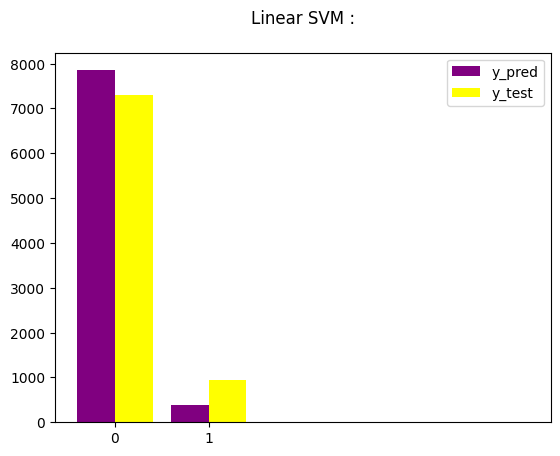

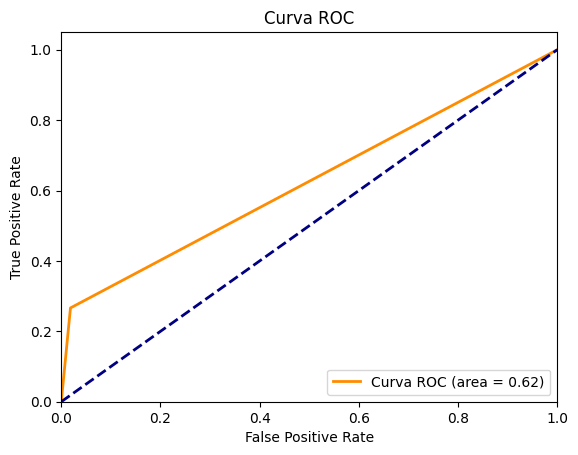

Accuracy: 0.899368778829813
Precision: 0.7813832040356288
Recall: 0.6239356693135285
F_score: 0.6616748785360509
Matrice di confusione:
 [[7157  135]
 [ 694  252]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7292
           1       0.65      0.27      0.38       946

    accuracy                           0.90      8238
   macro avg       0.78      0.62      0.66      8238
weighted avg       0.88      0.90      0.88      8238

Cross accuracy: 0.8188252764226858
Cross precision: 0.7096968474622276
Cross recall: 0.5209408232700463
Cross f_score: 0.5187740799092688


In [75]:
x = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True) #shuffle=True va a mischiare il dataset per risolvere quel problema del train set
    
classifiers = [RandomForestClassifier(), SVC(kernel="linear", C=0.025)]
names = ['Random forest:\n', 'Linear SVM :\n']

for idx, (classifier, name) in enumerate(zip(classifiers, names)):
    # Stampa il nome del classificatore
    print("\nClassificatore", idx+1, "-", name)
    
    #definisco il classificatore e faccio addestramento
    classifier.fit(X_train, y_train)    #forniamo insieme etichette e insieme valori istanze
    y_pred = classifier.predict(X_test)
    
    #creiamo istogramma in cui vedere risultati classificatore
    plt.hist([y_pred, y_test], bins=[0, 1, 2, 3, 4, 5], label=['y_pred', 'y_test'], align='left', color=['purple', 'yellow']) #vogliamo vedere sia predetta che textper legenda
    plt.xticks([0,1])
    plt.title(name)
    plt.yscale('linear')
    plt.legend()
    plt.show()
    
    #Studiamo l'accuratezza del modello
    
    # Calcolo della curva ROC e dell'AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Disegna la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()
    
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    #Eseguo cross-validation per 'migliorare' il classificatore
    scoring = {'precision':'precision_macro', 'recall':'recall_macro', 'f1_score':'f1_macro', 'accuracy':'accuracy'}
    score = cross_validate(classifier, x, y, scoring=scoring)
    cross_precision = score['test_precision'].mean()
    cross_accuracy = score['test_accuracy'].mean()
    cross_f_score = score['test_f1_score'].mean()
    cross_recall = score['test_recall'].mean()
    
    #Stampiamo metriche di valutazione, matrice di confusione e report di classificazione
    print('Accuracy:', accuracy)
    print('Precision:',precision)
    print('Recall:',recall)
    print('F_score:',f1)
    print('Matrice di confusione:\n',confusion)
    print(report)
    
    #Stampiamo le metriche della cross validation
    print('Cross accuracy:',cross_accuracy)
    print('Cross precision:',cross_precision)
    print('Cross recall:',cross_recall)
    print('Cross f_score:',cross_f_score)

Proviamo a riaddestrare e riusare i classificatori sul nuovo dataframe per vedere se le prestazioni sono effettivamente migliori


Classificatore 1 - Random forest:



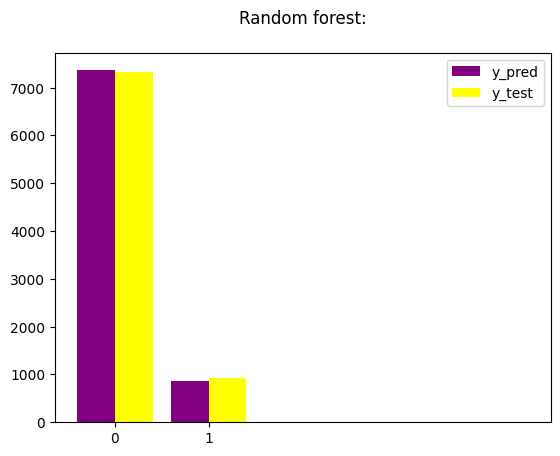

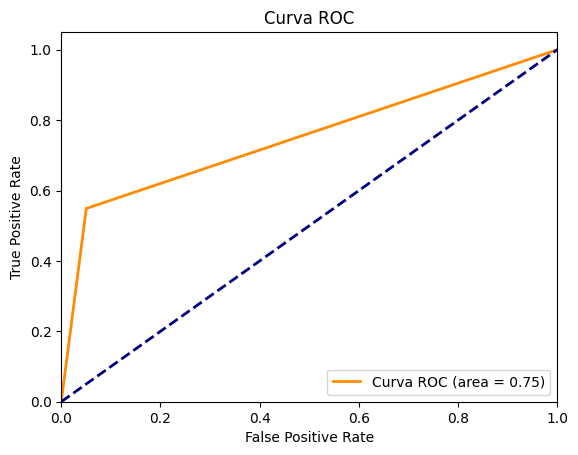

Accuracy: 0.9048312697256615
Precision: 0.7607239809724344
Recall: 0.749244715234621
F_score: 0.7547945086901395
Matrice di confusione:
 [[6949  369]
 [ 415  505]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7318
           1       0.58      0.55      0.56       920

    accuracy                           0.90      8238
   macro avg       0.76      0.75      0.75      8238
weighted avg       0.90      0.90      0.90      8238

Cross accuracy: 0.5200361009393866
Cross precision: 0.5407084238231568
Cross recall: 0.40206306257889207
Cross f_score: 0.3301956576507915

Classificatore 2 - K nearest neighbors:



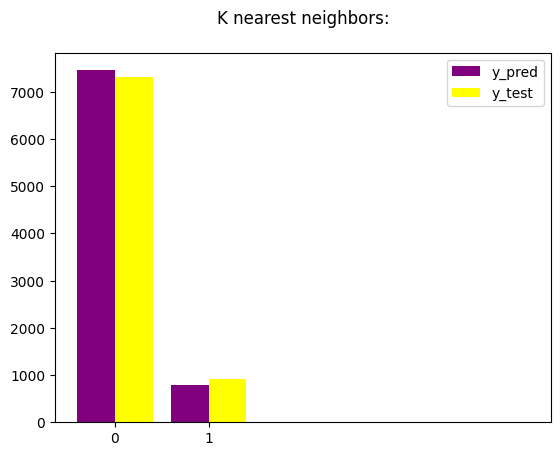

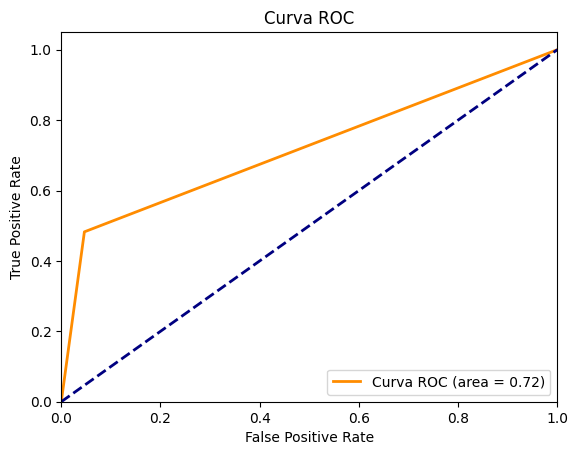

Accuracy: 0.900825443068706
Precision: 0.750869098153097
Recall: 0.7180056323300498
F_score: 0.7327550159214646
Matrice di confusione:
 [[6977  341]
 [ 476  444]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7318
           1       0.57      0.48      0.52       920

    accuracy                           0.90      8238
   macro avg       0.75      0.72      0.73      8238
weighted avg       0.89      0.90      0.90      8238

Cross accuracy: 0.7765054370843042
Cross precision: 0.6029893645892856
Cross recall: 0.587784920951439
Cross f_score: 0.5455622538021861


In [9]:
x = new_df.drop('y', axis=1)
y = new_df['y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True) #shuffle=True va a mischiare il dataset per risolvere quel problema del train set
    
classifiers = [RandomForestClassifier(), KNeighborsClassifier(n_neighbors=3)]
names = ['Random forest:\n', 'K nearest neighbors:\n']

for idx, (classifier, name) in enumerate(zip(classifiers, names)):
    # Stampa il nome del classificatore
    print("\nClassificatore", idx+1, "-", name)
    
    #definisco il classificatore e faccio addestramento
    classifier.fit(X_train, y_train)    #forniamo insieme etichette e insieme valori istanze
    y_pred = classifier.predict(X_test)
    
    #creiamo istogramma in cui vedere risultati classificatore
    plt.hist([y_pred, y_test], bins=[0, 1, 2, 3, 4, 5], label=['y_pred', 'y_test'], align='left', color=['purple', 'yellow']) #vogliamo vedere sia predetta che textper legenda
    plt.xticks([0,1])
    plt.title(name)
    plt.yscale('linear')
    plt.legend()
    plt.show()
    
    #Studiamo l'accuratezza del modello
    
    # Calcolo della curva ROC e dell'AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Disegna la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()
    
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    #Eseguo cross-validation per 'migliorare' il classificatore
    scoring = {'precision':'precision_macro', 'recall':'recall_macro', 'f1_score':'f1_macro', 'accuracy':'accuracy'}
    score = cross_validate(classifier, x, y, scoring=scoring)
    cross_precision = score['test_precision'].mean()
    cross_accuracy = score['test_accuracy'].mean()
    cross_f_score = score['test_f1_score'].mean()
    cross_recall = score['test_recall'].mean()
    
    #Stampiamo metriche di valutazione, matrice di confusione e report di classificazione
    print('Accuracy:', accuracy)
    print('Precision:',precision)
    print('Recall:',recall)
    print('F_score:',f1)
    print('Matrice di confusione:\n',confusion)
    print(report)
    
    #Stampiamo le metriche della cross validation
    print('Cross accuracy:',cross_accuracy)
    print('Cross precision:',cross_precision)
    print('Cross recall:',cross_recall)
    print('Cross f_score:',cross_f_score)